In [27]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Create a sample financial sentiment dataset
data = pd.DataFrame({
    'text': [
        "The market is showing strong growth this quarter",
        "We’re concerned about declining tech stock earnings",
        "Neutral performance across the board",
        "Client portfolio has increased 15%",
        "Investor confidence is waning due to interest rates",
        "Flat results with minimal change in performance",
        "Excellent quarter for long-term equity funds",
        "Losses in energy sector impacting returns",
        "Steady performance in bond markets",
        "Pessimism growing over inflation risks"
    ],
    'sentiment': [
        "positive", "negative", "neutral", "positive", "negative",
        "neutral", "positive", "negative", "neutral", "negative"
    ]
})


In [31]:
# Split data
X = data['text']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [33]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [35]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [37]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [39]:
# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
     neutral       1.00      1.00      1.00         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



C:\Users\Lacuesta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lacuesta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lacuesta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


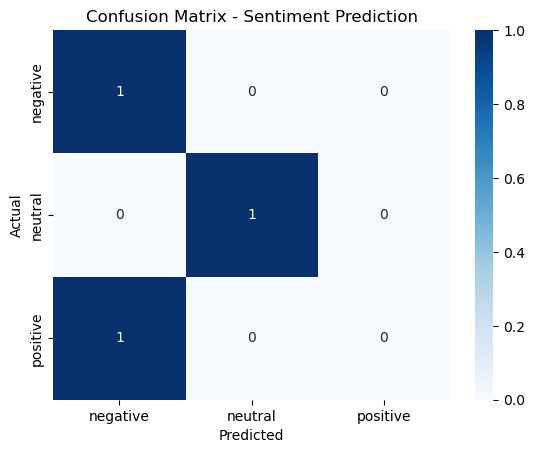

In [41]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix - Sentiment Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()